In [13]:
from keras.datasets import reuters
#로이터 뉴스 데이터 로딩, num_words 사용할 상위 단어수, maxlen 상위 1000개 단어
(X_train, y_train), (X_test, y_test) = reuters.load_data( num_words=1000,test_split=0.2)

In [14]:
from tensorflow.keras.preprocessing import sequence
# 제로패딩
X_train = sequence.pad_sequences(X_train, maxlen=50)
X_test = sequence.pad_sequences(X_test, maxlen=50)

In [15]:
X_train[0]

array([ 49,   8, 864,  39, 209, 154,   6, 151,   6,  83,  11,  15,  22,
       155,  11,  15,   7,  48,   9,   2,   2, 504,   6, 258,   6, 272,
        11,  15,  22, 134,  44,  11,  15,  16,   8, 197,   2,  90,  67,
        52,  29, 209,  30,  32, 132,   6, 109,  15,  17,  12])

In [16]:
y_train[:5]

array([3, 4, 3, 4, 4], dtype=int64)

In [17]:
from keras.utils import np_utils
#원핫인코딩
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [18]:
y_train[:5]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 

In [5]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding
model = Sequential()
#임베딩 레이어 Embedding(단어의개수, 벡터크기, 입력사이즈)
model.add(Embedding(1000,100)) #1000개의 단어가 입력되어 100차원으로 출력
#문장을 단어들의 시퀀스로 간주하고 순환 레이어의 입력으로, 출력노드수 100
model.add(LSTM(100)) # 타임스텝 100
model.add(Dense(46, activation='softmax')) #46개의 뉴스 카테고리
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# softmax - categorical_crossentropy

In [6]:
# train:validation:test = 6:2:2
from keras.callbacks import EarlyStopping
early_stopping=EarlyStopping(patience=3)
hist=model.fit(X_train,y_train,batch_size=128,epochs=100,validation_split=0.2,callbacks=[early_stopping])

Epoch 1/100
57/57 [==============================] - 3s 19ms/step - loss: 2.7131 - accuracy: 0.3493 - val_loss: 2.4099 - val_accuracy: 0.3450
Epoch 2/100
57/57 [==============================] - 1s 13ms/step - loss: 2.3462 - accuracy: 0.4021 - val_loss: 2.2518 - val_accuracy: 0.4786
Epoch 3/100
57/57 [==============================] - 1s 12ms/step - loss: 2.3458 - accuracy: 0.4051 - val_loss: 2.1626 - val_accuracy: 0.4903
Epoch 4/100
57/57 [==============================] - 1s 11ms/step - loss: 2.0783 - accuracy: 0.4966 - val_loss: 2.0311 - val_accuracy: 0.4947
Epoch 5/100
57/57 [==============================] - 1s 11ms/step - loss: 1.9444 - accuracy: 0.5054 - val_loss: 1.9003 - val_accuracy: 0.5426
Epoch 6/100
57/57 [==============================] - 1s 12ms/step - loss: 1.7530 - accuracy: 0.5411 - val_loss: 1.7161 - val_accuracy: 0.5509
Epoch 7/100
57/57 [==============================] - 1s 12ms/step - loss: 1.6509 - accuracy: 0.5633 - val_loss: 1.6888 - val_accuracy: 0.5648
Epoch 

In [7]:
print("\n 정확도 : %.4f" % (model.evaluate(X_test, y_test)[1]))

71/71 [==============================] - 0s 3ms/step - loss: 1.4558 - accuracy: 0.6523

 정확도 : 0.6523


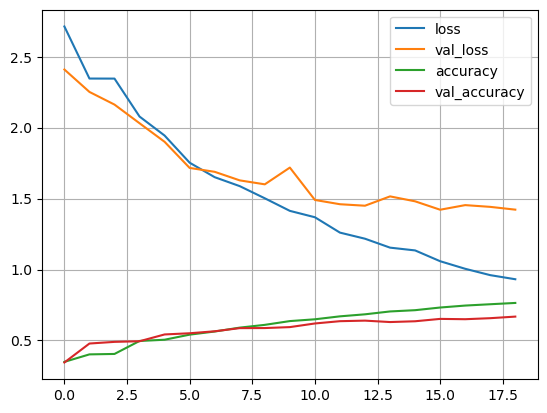

In [8]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['loss','val_loss','accuracy','val_accuracy'])
plt.grid()
plt.show()

In [19]:
import numpy as np
pred=model.predict(X_test)
print(pred[12])
np.argmax(pred[12]) # 제일 큰 값의 인덱스

71/71 [==============================] - 0s 6ms/step
[1.2785369e-03 8.7719840e-01 1.1301944e-02 3.0182004e-03 2.4654282e-02
 7.9079531e-03 3.1458470e-04 6.4935271e-06 7.3419069e-05 4.0499782e-03
 5.7378518e-03 4.8126271e-03 1.7788050e-05 1.8533582e-02 5.1107322e-04
 3.2996882e-03 1.0820848e-03 5.3860713e-04 3.8104175e-05 1.2040543e-03
 9.1777605e-05 6.6823523e-05 4.4896617e-04 1.5567599e-03 1.1337120e-02
 6.8489439e-04 5.8005459e-04 9.9272467e-04 1.2555488e-02 2.3202867e-05
 3.8142894e-05 1.7937183e-03 1.1528895e-03 7.9494530e-06 8.6399727e-05
 9.8269056e-06 4.3427364e-05 1.6679415e-04 8.1326900e-04 1.7276824e-04
 1.2100558e-04 1.3937037e-03 1.9234999e-04 2.9921616e-06 1.0628661e-05
 7.7063189e-05]


1

In [20]:
print(y_test[12])
np.argmax(y_test[12])

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1